In [1]:
import os 
from general_plot import *

model_name = model_name_list[0] 


In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [1 2 3 4 5]
u_random: [   9   81  513 3321]


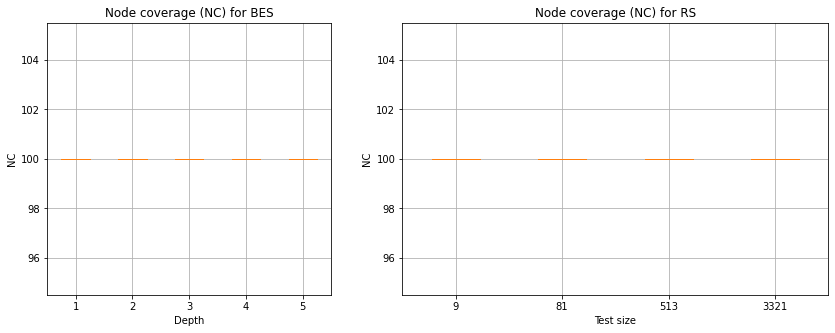

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
map_bes= {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'title': 'Node coverage (NC) for BES',
    'x_label': 'Depth',
    'y_label': 'NC',
    'width_ratio': 1,
    'distance_to_figures': 1
}

map_rand = {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),

    'title': 'Node coverage (NC) for RS',
    'x_label': 'Test size',
    'y_label': 'NC',
    'width_ratio': 1.5
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, map_bes, map_rand)
    

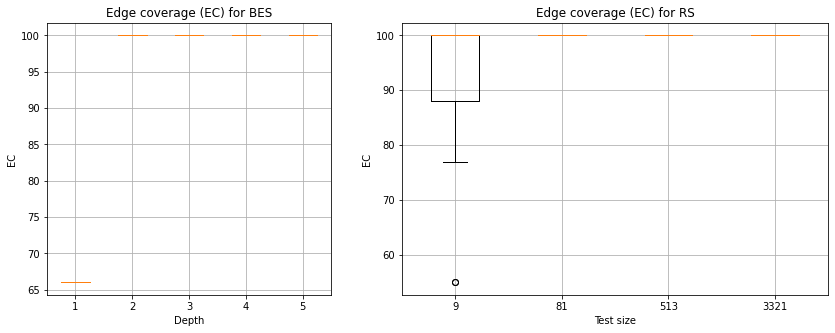

In [3]:
# ec 
coverage = 'EC'
map_bes['title'] = f'Edge coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Edge coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, map_bes, map_rand)



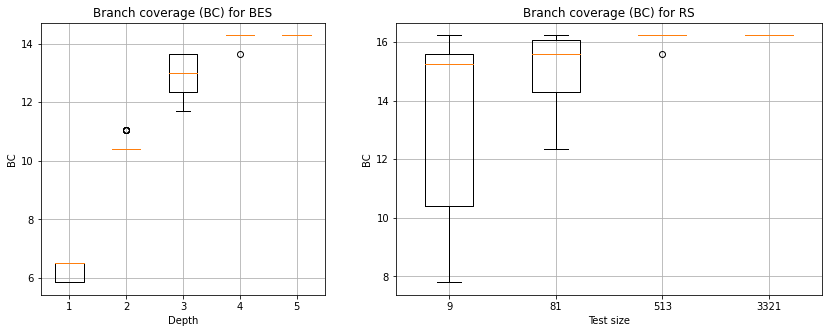

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
map_bes['title'] = f'Branch coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Branch coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

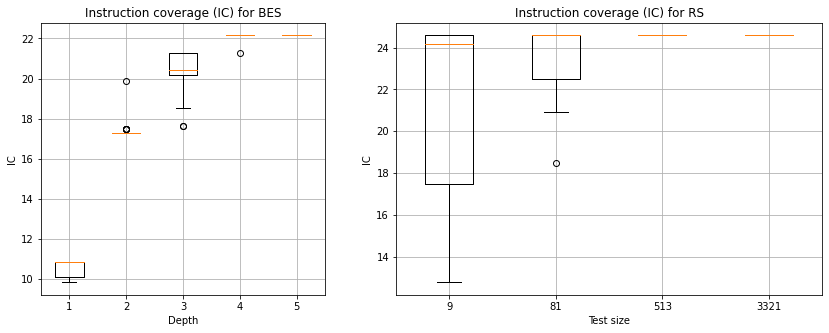

In [5]:
# ic
coverage = 'IC'
map_bes['title'] = f'Instruction coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Instruction coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

depth 1 --> [9]
depth 2 --> [81]
depth 3 --> [513]
depth 4 --> [3321]
depth 5 --> [22661, 22665, 22668, 22670, 22671, 22673, 22674, 22677, 22680, 22681, 22682, 22684, 22685, 22687, 22688, 22692, 22693, 22698, 22700, 22704, 22705, 22708, 22710, 22711, 22712]


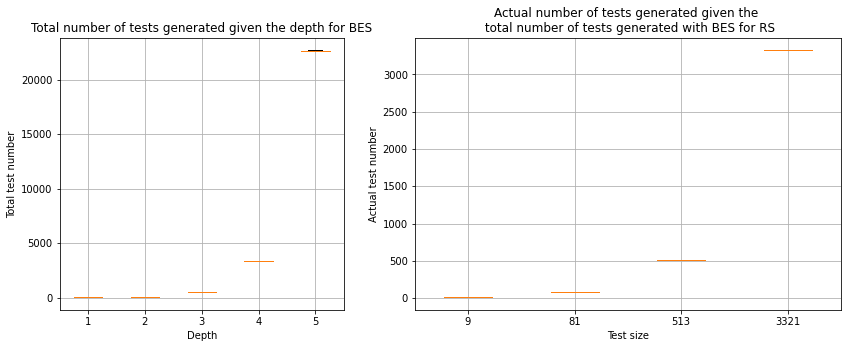

In [6]:
# total_test
creteria = 'total_tests'
map_bes['title'] = f'Total number of tests generated given the depth for BES'
map_bes['y_label'] = 'Total test number'
# 'width_ratio': 1
map_bes['distance_to_figures'] = 1.05

map_rand['title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
map_rand['y_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)

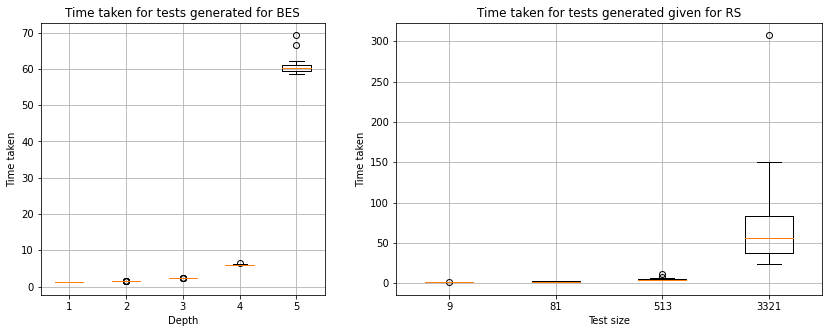

In [7]:
# time_taken
creteria = 'time_taken'
map_bes['title'] = f'Time taken for tests generated for BES'
map_bes['y_label'] = 'Time taken'
map_bes['distance_to_figures'] = 1

map_rand['title'] = f'Time taken for tests generated given for RS'
map_rand['y_label'] = 'Time taken'
map_rand['width_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')
    
compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [1 2 3 4 5]
u_random: [   9   81  507 3234]


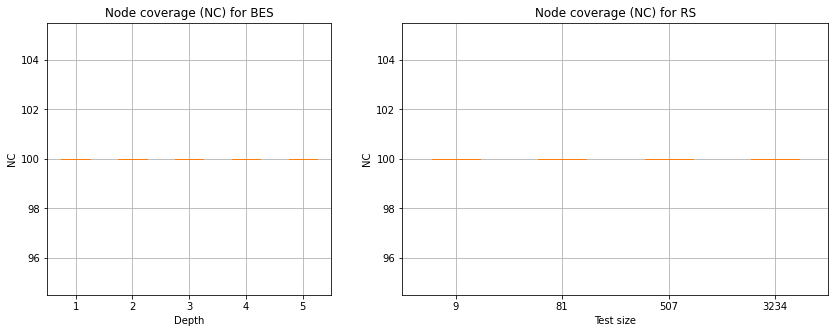

In [8]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
map_bes= {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'title': 'Node coverage (NC) for BES',
    'x_label': 'Depth',
    'y_label': 'NC',
    'width_ratio': 1,
    'distance_to_figures':  1
}

map_rand = {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),

    'title': 'Node coverage (NC) for RS',
    'x_label': 'Test size',
    'y_label': 'NC',
    'width_ratio': 1.5
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, map_bes, map_rand)
    

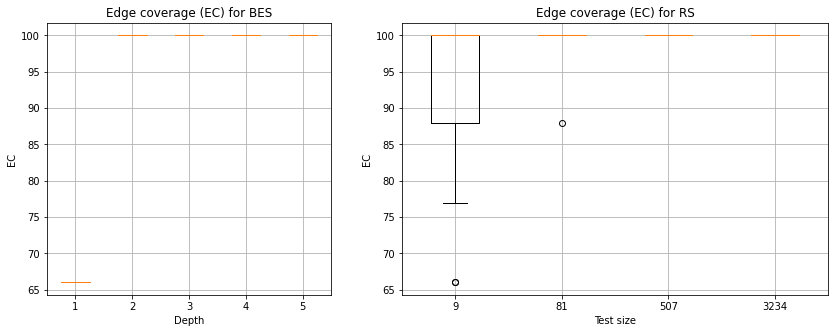

In [9]:
# ec 
coverage = 'EC'
map_bes['title'] = f'Edge coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Edge coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, map_bes, map_rand)



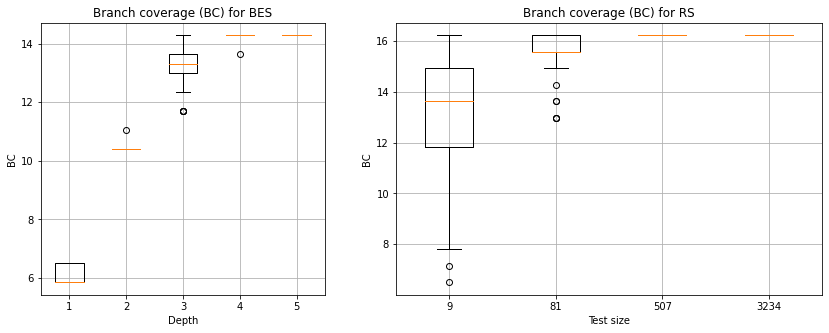

In [10]:
# bc
coverage = 'BC'  #TODO here bc are the same
map_bes['title'] = f'Branch coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Branch coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

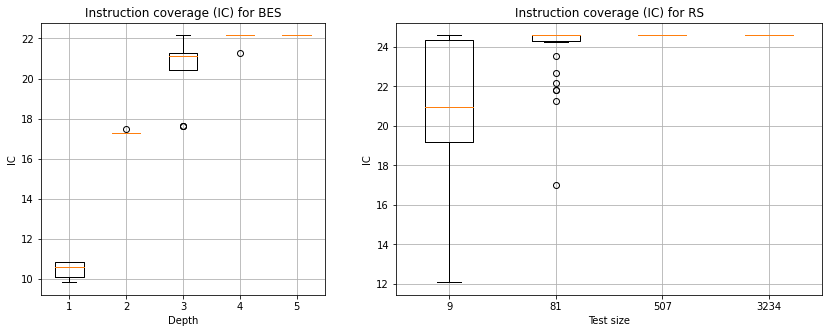

In [11]:
# ic
coverage = 'IC'
map_bes['title'] = f'Instruction coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Instruction coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

depth 1 --> [9]
depth 2 --> [81]
depth 3 --> [507]
depth 4 --> [3234]
depth 5 --> [21697, 21698, 21666, 21670, 21674, 21688, 21677, 21709, 21691, 21679, 21683, 21684, 21654, 21687, 21655, 21657, 21659, 21661, 21694, 21663]


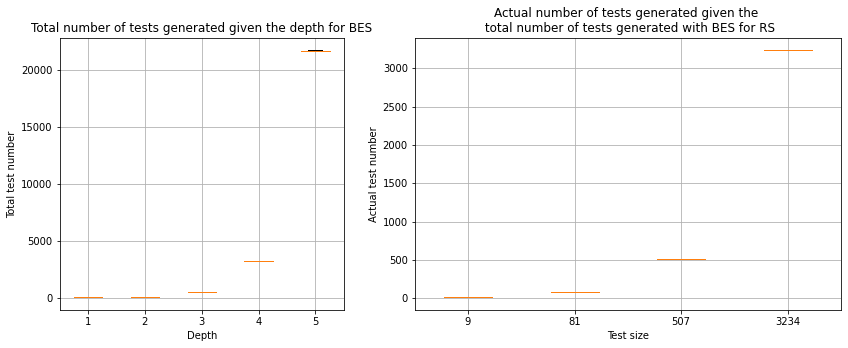

In [12]:
# total_test
creteria = 'total_tests'
map_bes['title'] = f'Total number of tests generated given the depth for BES'
map_bes['y_label'] = 'Total test number'
# 'width_ratio': 1
map_bes['distance_to_figures'] = 1.05

map_rand['title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
map_rand['y_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)

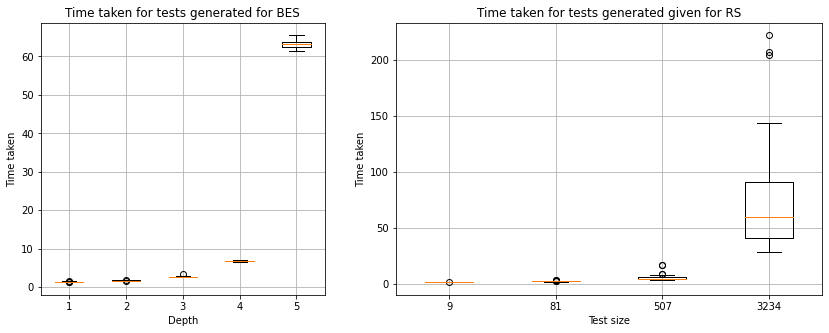

In [13]:
# time_taken
creteria = 'time_taken'
map_bes['title'] = f'Time taken for tests generated for BES'
map_bes['y_label'] = 'Time taken'
map_bes['distance_to_figures'] = 1

map_rand['title'] = f'Time taken for tests generated given for RS'
map_rand['y_label'] = 'Time taken'
map_rand['width_ratio']: 1
    
time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



In [14]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





